In [1]:
# Import the necessary libraries: OpenCV for image processing and os for file path operations
import cv2
import os

# Set the path to the source directory, which contains the original images for face extraction
source_folder_path = '/content/drive/MyDrive/copied'
# Set the path to the destination directory, where the extracted face images will be saved
destination_folder_path = '/content/extracted_faces'

# Create the destination directory if it doesn't exist; 'exist_ok=True' avoids an error if the directory already exists
os.makedirs(destination_folder_path, exist_ok=True)

# Load the Haar cascade classifier for frontal face detection, which comes pre-trained with OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define a function to extract faces from images within a specified subfolder
def extract_and_save_faces(subfolder_name):
    # Construct the path to the current subfolder within the source directory
    subfolder_path = os.path.join(source_folder_path, subfolder_name)
    # Loop through each file in the subfolder
    for filename in os.listdir(subfolder_path):
        # Check if the file is an image with one of the specified extensions
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Construct the full image path
            image_path = os.path.join(subfolder_path, filename)
            # Read the image using OpenCV
            image = cv2.imread(image_path)
            # Convert the image to grayscale, which is necessary for face detection
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            # Detect faces in the image using the classifier
            faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

            # Loop through the faces detected in the image
            for i, (x, y, w, h) in enumerate(faces):
                # Extract the face region from the image
                face = image[y:y+h, x:x+w]
                # Create a subfolder path within the destination directory, one for each label
                face_subfolder_path = os.path.join(destination_folder_path, subfolder_name)
                # Create the subfolder if it doesn't exist
                os.makedirs(face_subfolder_path, exist_ok=True)
                # Construct the path to save the extracted face image with the same filename
                face_filename = os.path.join(face_subfolder_path, filename)
                # Save the extracted face image at the constructed path
                cv2.imwrite(face_filename, face)

# Loop through each label (subfolder) in the source directory
for label in os.listdir(source_folder_path):
    # Check if the current item is a directory (label)
    if os.path.isdir(os.path.join(source_folder_path, label)):
        # Call the function to extract and save faces for the current label
        extract_and_save_faces(label)

# Print a message when the face extraction and saving process is complete
print("Face extraction and saving process is complete.")


Face extraction and saving process is complete.


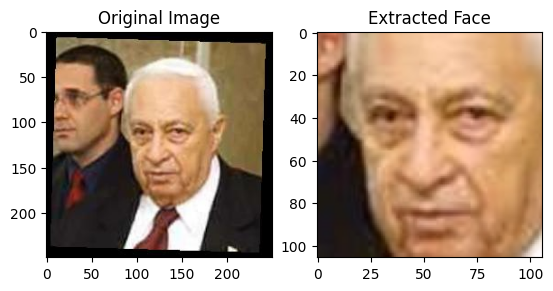

In [4]:
# Import required libraries
import cv2  # OpenCV library for computer vision tasks
import os  # Library for interacting with the operating system
import random  # Library to generate random numbers
import matplotlib.pyplot as plt  # Library for creating static, interactive, and animated visualizations

# Define the source and destination folder paths where the images are stored
source_folder_path = '/content/drive/MyDrive/copied'  # Path to the folder with original images
destination_folder_path = '/content/extracted_faces'  # Path to the folder with extracted face images

# Function definition to get a random image path from a directory
def get_random_image_path(folder_path):
    # Get a list of all subdirectories in the folder_path
    subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]
    # Randomly choose one subfolder from the list of subfolders
    random_subfolder = random.choice(subfolders)
    # Get a list of all image file names in the randomly chosen subfolder
    images = [img for img in os.listdir(random_subfolder) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    # If there are no images, return None
    if not images:
        return None
    # Randomly choose one image from the list of images
    random_image = random.choice(images)
    # Return the full path to the randomly chosen image
    return os.path.join(random_subfolder, random_image)

# Execute the function to get a random image path
random_image_path = get_random_image_path(source_folder_path)

# Check if a valid image path was returned
if random_image_path:
    # Read the original image from the random path obtained
    original_image = cv2.imread(random_image_path)
    # Convert the color space from BGR to RGB for displaying with matplotlib
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    # Plot the original image in a subplot
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Original Image')

    # Prepare the path for the corresponding extracted face image
    subfolder_name = os.path.basename(os.path.dirname(random_image_path))
    filename = os.path.basename(random_image_path)
    face_image_path = os.path.join(destination_folder_path, subfolder_name, filename)
    # Check if the corresponding extracted face image exists
    if os.path.exists(face_image_path):
        # Read and display the extracted face image
        face_image = cv2.imread(face_image_path)
        face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 2, 2)
        plt.imshow(face_image)
        plt.title('Extracted Face')
    else:
        # Display a message if the corresponding face image is not found
        plt.subplot(1, 2, 2)
        plt.text(0.5, 0.5, 'No corresponding face found', horizontalalignment='center', verticalalignment='center')
        plt.title('Extracted Face')
else:
    # Display a message if no image is found in the source folder
    plt.text(0.5, 0.5, 'No image found in the source folder', horizontalalignment='center', verticalalignment='center')
    plt.title('No Image')

# Show the plotted images and messages
plt.show()


In [5]:
#installing pillow to use PIL package
!pip install pillow

Number of Classes: 8
Mean Width: 114.07861635220125
Mean Height: 114.07861635220125


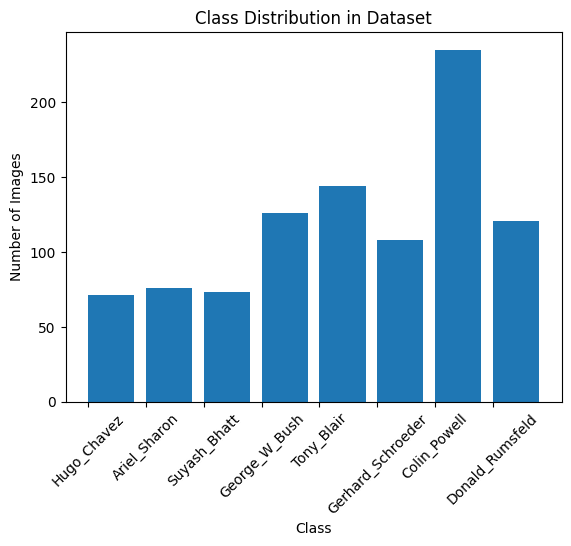

In [6]:
#code to perform EDA on the extracted faces folder .print number of classes ,mean width ,height and class distribution

import os
from PIL import Image
import matplotlib.pyplot as plt

# Directory containing the dataset
data_directory = '/content/extracted_faces'

# Store class names and image sizes
class_names = []
image_widths = []
image_heights = []

# Iterate through each class (subfolder) in the dataset directory
for class_name in os.listdir(data_directory):
    class_dir = os.path.join(data_directory, class_name)
    if os.path.isdir(class_dir):
        class_names.append(class_name)
        # Iterate through each image in the subfolder
        for image_file in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_file)
            with Image.open(image_path) as img:
                width, height = img.size
                image_widths.append(width)
                image_heights.append(height)

# Calculate mean width and height
mean_width = sum(image_widths) / len(image_widths)
mean_height = sum(image_heights) / len(image_heights)
# Print the number of classes
print(f"Number of Classes: {len(class_names)}")
print(f"Mean Width: {mean_width}")
print(f"Mean Height: {mean_height}")

# Count the frequency of images in each class
class_frequencies = {class_name: len(os.listdir(os.path.join(data_directory, class_name)))
                     for class_name in class_names}


# Plotting the class distribution
plt.bar(class_frequencies.keys(), class_frequencies.values(),align='edge')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Dataset')
plt.xticks(rotation=45)
plt.show()


In [7]:
pip install dlib opencv-python


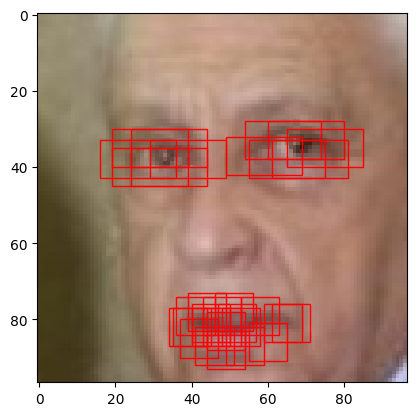

In [10]:
#code to detect facial landmarks in the images .Not used in the model training

'''
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import random

# Initialize dlib's face detector and load the facial landmark predictor
predictor_path = '/content/shape_predictor_68_face_landmarks.dat'  # Update this path
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

# Function to detect facial landmarks and draw boxes around the eyes and mouth
def detect_and_draw_facial_landmarks(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)
        fig, ax = plt.subplots()
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Draw boxes around eyes and mouth
        for n in range(36, 48):  # Eye landmarks
            x, y = landmarks.part(n).x, landmarks.part(n).y
            ax.add_patch(patches.Rectangle((x-10, y-5), 20, 10, linewidth=1, edgecolor='r', facecolor='none'))

        for n in range(48, 68):  # Mouth landmarks
            x, y = landmarks.part(n).x, landmarks.part(n).y
            ax.add_patch(patches.Rectangle((x-5, y-5), 10, 10, linewidth=1, edgecolor='r', facecolor='none'))

        plt.show()
        break  # Process only the first detected face

# Function to get a random image from subdirectories
def get_random_image_from_subfolders(base_path):
    subfolders = [os.path.join(base_path, f) for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]
    selected_subfolder = random.choice(subfolders)
    images = [os.path.join(selected_subfolder, f) for f in os.listdir(selected_subfolder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    return random.choice(images) if images else None

# Path to the dataset
dataset_path = '/content/extracted_faces'

# Get a random image from the dataset
random_image_path = get_random_image_from_subfolders(dataset_path)
if random_image_path:
    detect_and_draw_facial_landmarks(random_image_path)
else:
    print("No images found in the dataset.")

    '''


In [11]:
pip install numpy matplotlib scikit-learn


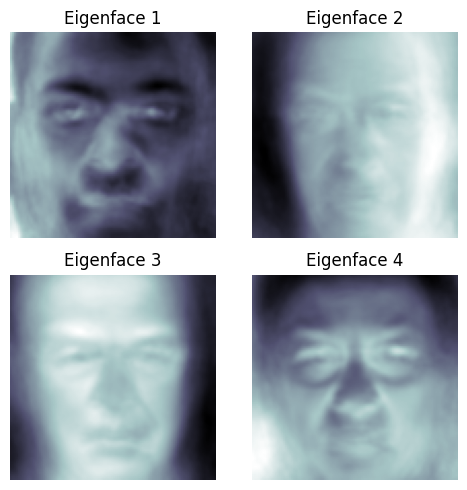

In [12]:
#code to display eigen faces used for PCA. Not used for model training
'''
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isdir(img_path):  # If the path is a directory, recursively load images
            images.extend(load_images_from_folder(img_path))
        elif img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            img = img.resize((100, 100))  # Resize to a common size
            images.append(np.array(img).flatten())  # Flatten the image and append
    return images

# Load images
folder_path = '/content/extracted_faces'
images = load_images_from_folder(folder_path)

# Convert list of images to numpy array
image_array = np.array(images)

# Apply PCA
pca = PCA(n_components=100)  # Adjust the number of components
pca.fit(image_array)

# Visualize the first few eigenfaces
# Visualize the first four eigenfaces in a 2 x 2 format
fig, axes = plt.subplots(2, 2, figsize=(5, 5))  # Create a 2x2 subplot grid
for i, ax in enumerate(axes.flat):
    if i < 4:  # Ensure only the first four components are displayed
        ax.imshow(pca.components_[i].reshape(100, 100), cmap='bone')
        ax.set_title(f'Eigenface {i+1}')
        ax.axis('off')
plt.tight_layout()
plt.show()
'''

In [13]:
# Import necessary libraries
import os  # For path operations
import numpy as np  # For numerical operations
from PIL import Image  # For image processing

# For data visualization
from matplotlib import pyplot as plt
from time import time  # For timing operations

# Import sklearn utilities for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, auc
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from skimage.feature import hog  # For extracting Histogram of Oriented Gradients (HOG) features

# Set the base folder where the extracted face images are stored
base_folder = '/content/extracted_faces'

# List the names of the subfolders within the base folder, which are the labels for the images
label_names = [label for label in os.listdir(base_folder) if os.path.isdir(os.path.join(base_folder, label))]

# Function to create features from an image
def create_features(img, show_hog=False):
    # Flatten the color image to create color features
    color_features = img.flatten()
    # Convert the color image to greyscale and create greyscale image features
    grey_image = np.array(0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2])
    # Extract HOG features from the greyscale image
    hog_features, hog_image = hog(grey_image, visualize=True, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    # Optionally show the HOG image
    if show_hog:
        plt.imshow(hog_image, cmap="gray")
    # Combine color and HOG features into a single flat array
    flat_features = np.hstack((color_features, hog_features))
    return flat_features

# Function to load images and their corresponding labels
def load_images_and_labels(base_folder):
    images = []  # List to store loaded images
    labels = []  # List to store corresponding labels
    # Loop through each folder representing a label
    for label_folder in os.listdir(base_folder):
        folder_path = os.path.join(base_folder, label_folder)
        if os.path.isdir(folder_path):
            # Loop through each image file in the folder
            for image_file in os.listdir(folder_path):
                if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_path = os.path.join(folder_path, image_file)
                    img = Image.open(image_path)
                    img = img.convert('RGB')  # Ensure image is in RGB format
                    img = img.resize((250, 250))  # Resize image to 250x250 pixels
                    img_rgb = np.array(img)  # Convert image to a numpy array
                    images.append(img_rgb)  # Add the image to the list
                    labels.append(label_folder)  # Add the label to the list
    return np.asarray(images), np.asarray(labels)  # Convert lists to numpy arrays and return

# Load images and their labels from the base folder
images, labels = load_images_and_labels(base_folder)
print("Images Shape:", images.shape)  # Print the shape of the images array
print("Labels Shape:", labels.shape)  # Print the shape of the labels array

# Initialize an empty list to hold the feature matrix
feature_matrix = []
# Loop over the images and extract features
for x in images:
    feature_matrix.append(create_features(x))

# Convert the list of features into a numpy array
feature_matrix = np.asarray(feature_matrix)
print('Feature matrix shape is: ', feature_matrix.shape)  # Print the shape of the feature matrix

# Initialize a StandardScaler object
ss = StandardScaler()
# Standardize the feature matrix
bees_stand = ss.fit_transform(feature_matrix)

# Initialize PCA with 500 components
pca = PCA(n_components=500)
# Fit PCA on the standardized feature matrix
pca.fit(bees_stand)
# Transform the data according to the fitted PCA
X_pca = pca.transform(bees_stand)

# Standardize the PCA-transformed data
bees_pca = ss.fit_transform(X_pca)
# Print the new shape of the PCA-transformed and standardized data
print('PCA matrix shape is: ', bees_pca.shape)


Images Shape: (954, 250, 250, 3)
Labels Shape: (954,)
Feature matrix shape is:  (954, 201189)
PCA matrix shape is:  (954, 500)


The step to print image details is important before training the model 

In [14]:
# label_encoder object knows
# how to understand word labels.
label_encoder = LabelEncoder()

# Encode labels in column 'species'.
Y = label_encoder.fit_transform(labels)

In [15]:
# Split the dataset into training and testing sets using sklearn's train_test_split function
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, random_state=42)

# Initialize an SVM classifier with the class weights balanced and a fixed random state
clf = SVC(class_weight='balanced', random_state=42)

# Define a dictionary of parameters for grid search
# 'C' is the regularization parameter, 'gamma' is the kernel coefficient for 'rbf', and 'kernel' specifies the kernel type
parameters = {'C': [0.1, 1, 10],  # Regularization parameter
             'gamma': [1e-3, 1e-6, 1e-9],  # Kernel coefficient for 'rbf'
             'kernel': ['rbf', 'linear']}  # Type of kernel

# Initialize GridSearchCV with the classifier, parameters to search, and set the number of jobs to run in parallel
# 'n_jobs=-1' means using all processors, 'cv=5' means 5-fold cross-validation
grid_search = GridSearchCV(clf, parameters, n_jobs=-1, cv=5)

# Store the current time for timing the grid search
t0 = time()

# Fit the grid search with the training data
grid_search.fit(X_train, Y_train)

# Print the time it took to perform the grid search
print("grid_search in %0.fs" % (time() - t0))


grid_search in 14s


In [16]:
print(f"The best model is: {grid_search.best_params_}.")

The best model is: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}.


In [17]:
print("The best mean accuracy: ", grid_search.best_score_)


The best mean accuracy:  0.9006993006993007


In [18]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test)

In [19]:
#code to print precision,recall,f1-score 
print(f"Accuracy: {clf_best.score(X_test, Y_test)*100:.1f}%")
print(classification_report(Y_test, pred, target_names=label_names))

Accuracy: 92.1%
                   precision    recall  f1-score   support

      Hugo_Chavez       0.90      0.95      0.93        20
     Ariel_Sharon       0.98      0.91      0.94        54
     Suyash_Bhatt       0.97      0.97      0.97        30
    George_W_Bush       0.91      0.88      0.90        34
       Tony_Blair       0.96      0.87      0.91        30
Gerhard_Schroeder       0.80      0.95      0.87        21
     Colin_Powell       1.00      1.00      1.00        13
  Donald_Rumsfeld       0.85      0.92      0.88        37

         accuracy                           0.92       239
        macro avg       0.92      0.93      0.92       239
     weighted avg       0.92      0.92      0.92       239



Insights:
The classification report reflects the performance of a facial recognition model. The model has achieved an overall accuracy of 92.1%, which is relatively high, indicating that it is effective at correctly identifying individuals in most cases.

Here's what the terms in the report mean:

Precision: This measures the accuracy of the positive predictions. For example, when the model predicts "Colin Powell," it is correct 100% of the time.

Recall: This assesses the model's ability to identify all actual positives. For instance, "Colin Powell" has a recall of 1.00, meaning all images of Colin Powell were correctly identified by the model.

F1-Score: This is the harmonic mean of precision and recall, providing a single score that balances both concerns. An F1-score of 1 is the best value, indicating perfect precision and recall. For example, "Colin Powell" has an F1-score of 1.00, which is ideal.

Support: This indicates the number of true instances for each label in the data used to generate the report. For example, there were 54 images of "Ariel_Sharon" in the test set.

From the report, several insights can be gained:

The model is exceptionally precise and consistent in identifying "Colin Powell," with perfect scores across all metrics.
"Gerhard_Schroeder" has a lower precision but a high recall, suggesting that while most images of Schröder are correctly identified, there are also some false positives.
The model seems to struggle slightly with "Donald_Rumsfeld," having lower precision and F1-score compared to others.
The macro average and weighted average are both 0.92 across precision, recall, and F1-score, signifying a balanced performance across different classes, not overly influenced by any class due to uneven support.
The high recall values indicate the model's strength in detecting the presence of specific individuals, which is critical for applications like security and identity verification.
Overall, the model demonstrates strong performance but might benefit from additional fine-tuning or more balanced data to improve the precision for certain individuals.

In [20]:
#code to save best performing models of SVM,PCA,label_encoder 
from joblib import dump


dump(ss, 'standard_scaler.joblib')
dump(pca, 'pca.joblib')
dump(clf_best, 'svm_model.joblib')
dump(label_encoder, 'label_encoder.joblib')


['label_encoder.joblib']

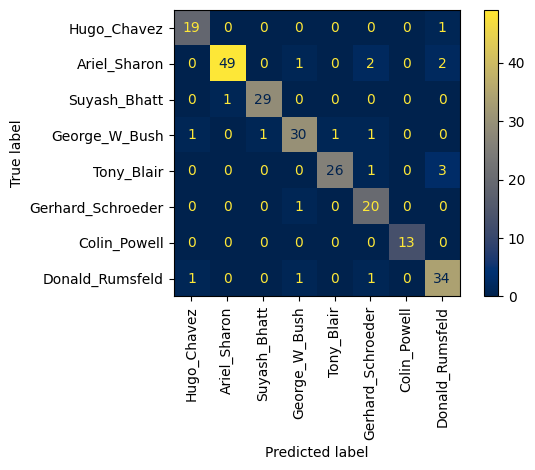

In [21]:
#code to print confusion matrix
ConfusionMatrixDisplay.from_estimator(
    grid_search, X_test, Y_test, display_labels=label_names, xticks_rotation="vertical",cmap='cividis'
)
plt.tight_layout()
plt.show()

Insights:
The confusion matrix image shows the performance of a classification model on a dataset with images of various individuals. The matrix helps identify how well the model predicts the correct label for each individual and where it makes errors.

Key insights from the matrix:

High Diagonal Values: The strong diagonal line indicates many correct predictions, with "Ariel_Sharon" having the highest correct predictions (49), followed by "Donald_Rumsfeld" (34) and "Hugo_Chavez" (19).

Misclassifications: There are several off-diagonal numbers where the model predicted the wrong label. For instance, "Ariel_Sharon" was occasionally mistaken for "Suyash_Bhatt," "George_W_Bush," "Tony_Blair," and "Donald_Rumsfeld."

Perfect Prediction: "Colin_Powell" was perfectly classified, with all 13 instances correctly identified.

Most Confused Pair: "George_W_Bush" seems to be the most confused class, particularly with "Ariel_Sharon" and "Tony_Blair." This suggests that the model may find their facial features similar or that the model lacks sufficient discriminatory power for these individuals.

Least Represented Class: "Colin_Powell" has the smallest number of samples (13), yet the model performed perfectly for this class, indicating high model confidence in its features.

Potential Bias: Classes like "Ariel_Sharon" with higher support (number of true instances) might dominate the training, leading to better performance at the expense of classes with fewer instances.

Overall, Due to the limitation of dataset chosen ,the model performs well but shows room for improvement, especially in distinguishing between individuals with similar features. More balanced training data, higher resolution images, or a more complex model could potentially address these misclassifications.

In [22]:
pip install opencv-python

<IPython.core.display.Javascript object>

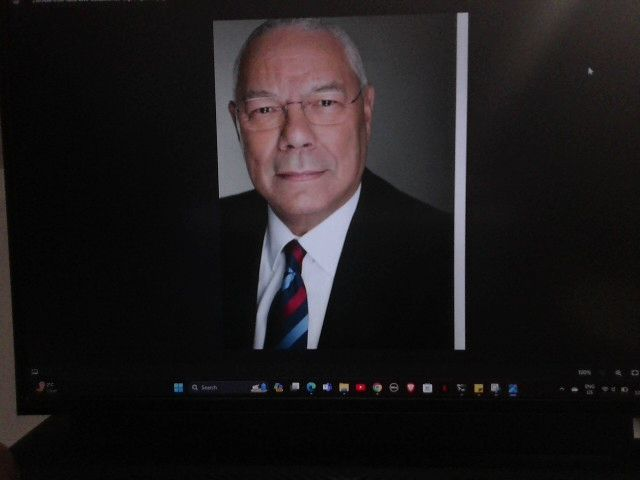

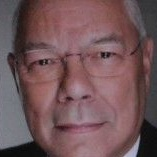

In [31]:
# @title Default title text
#code to open webcam and save the entire frame in photo.jpg and detect face and store in photo.jpg
from IPython.display import display, Javascript
from PIL import Image as PilImage  # Importing PIL's Image with an alias

from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Function to detect and save face
def detect_and_save_face(filename,padding_percentage=0.4):
    # Load the pre-trained Haar Cascade model for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Read the image
    img = cv2.imread(filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    if len(faces) == 0:
        print("No face detected.")
        return

    # For simplicity, save only the first detected face
    for (x, y, w, h) in faces:
        face = img[y:y+h, x:x+w]
        cv2.imwrite('face.jpg', face)
        break

# Capture a photo
filename = take_photo()

# Detect and save face
detect_and_save_face(filename)
display (Image(filename='photo.jpg'))
print('\n')
display (Image(filename='face.jpg'))

In [32]:
#load previously trained models for better accuracy
from joblib import load


# Load the trained models and preprocessors
ss = load('standard_scaler.joblib')
pca = load('pca.joblib')
clf_best = load('svm_model.joblib')
label_encoder = load('label_encoder.joblib')






# Load the face image
face_img_path = '/content/face.jpg'  # Update with the correct path to face.jpg
face_img = PilImage.open(face_img_path)


face_img = face_img.convert('RGB')  # Convert to RGB
face_img = face_img.resize((250, 250))  # Resize to 250x250
face_img_rgb = np.array(face_img)

# Extract features from the face image
face_features = create_features(face_img_rgb)

# Standardize the features (assuming 'ss' is your StandardScaler)

ss.fit_transform([face_features])  # Replace with your StandardScaler used in training
standardized_features = ss.transform([face_features])


face_pca_features = pca.transform(standardized_features)

# Predict with SVM (assuming 'clf_best' is your trained SVM model)
#clf_best = SVC()  # Replace with your trained SVM model
predicted_label = clf_best.predict(face_pca_features)

# Assuming you have a label encoder (label_encoder), invert the predicted label
predicted_label_name = label_encoder.inverse_transform([predicted_label])[0]

print(f"Predicted Label: {predicted_label_name}")


Predicted Label: Colin_Powell


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
